# PySpark Regression Analysis: Predicting Yearly Amount Spent on Ecommerce Customers Dataset

In [1]:
# Importing the necessary libraries

from pyspark.sql import SparkSession
from pyspark import SparkContext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier, NaiveBayes, LinearSVC, LogisticRegression
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, DecisionTreeRegressor, GBTRegressor
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator, RegressionEvaluator
from sklearn.metrics import confusion_matrix

In [2]:
# Create a spark session
spark=SparkSession.builder.appName("app").getOrCreate()

In [3]:
# Loading data
df=spark.read.csv("Ecommerce_Customers.csv",header=True,inferSchema=True)

In [4]:
# Showing first five rows
df.show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|riverarebecca@gma...|1414 David Throug...|   

In [5]:
# Showing column names
df.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [6]:
# Showing basic information about data
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [7]:
# showing datatypes
df.dtypes

[('Email', 'string'),
 ('Address', 'string'),
 ('Avatar', 'string'),
 ('Avg Session Length', 'double'),
 ('Time on App', 'double'),
 ('Time on Website', 'double'),
 ('Length of Membership', 'double'),
 ('Yearly Amount Spent', 'double')]

In [8]:
# Showing basic statistical insights
df.describe().show()

+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|            Email|             Address|     Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|              500|                 500|        500|               500|               500|               500|                 500|                500|
|   mean|             NULL|                NULL|       NULL| 33.05319351819619|12.052487937166134| 37.06044542094859|   3.533461555915055|  499.3140382585909|
| stddev|             NULL|                NULL|       NULL|0.9925631110845354|0.9942156084725424|1.0104889067564033|  0.9992775024112585|   79.3147815497068|
|    min|aaron04@yahoo.com|0001 Mack MillNor..

In [9]:
# Another way of Showing basic statistical insights
df.describe().toPandas()

,summary,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,count,500,500,500,500,500,500,500,500
1,mean,None,None,None,33.05319351819619,12.052487937166134,37.06044542094859,3.533461555915055,499.3140382585909
2,stddev,None,None,None,0.9925631110845354,0.9942156084725424,1.0104889067564033,0.9992775024112585,79.3147815497068
3,min,aaron04@yahoo.com,"0001 Mack MillNorth Jennifer, NE 42021-5936",AliceBlue,29.532428967057943,8.508152176032603,33.91384724758464,0.2699010899842742,256.67058229005585
4,max,zscott@wright.com,Unit 7502 Box 8345DPO AE 53747,YellowGreen,36.13966248879052,15.126994288792467,40.005181638101895,6.922689335035808,765.5184619388373


In [10]:
# Number of rows
df.count()

500

In [11]:
# Checking missing values
c=['Email','Address','Avatar','Avg Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']

for i in c:
    print(i, df.filter(col(i).isNull()).count())

Email 0
Address 0
Avatar 0
Avg Session Length 0
Time on App 0
Time on Website 0
Length of Membership 0
Yearly Amount Spent 0


In [12]:
# There is no missing values

In [13]:
# Checkin g for duplicated values
print(df.count()-df.dropDuplicates().count())

0


In [14]:
# There is no duplicated rows

In [15]:
# Showing distinct avatar
df.groupby("Avatar").count().show()

+--------------+-----+
|        Avatar|count|
+--------------+-----+
|   ForestGreen|    2|
|       DimGray|    4|
|      SeaGreen|    4|
|          Aqua|    6|
|          Teal|    7|
|    DodgerBlue|    3|
|     MintCream|    3|
|         Khaki|    2|
|     LightGray|    3|
|     LightBlue|    2|
|         Olive|    5|
|     OrangeRed|    2|
|LightSteelBlue|    3|
|      SeaShell|    3|
|       Crimson|    5|
|     BurlyWood|    3|
|       SkyBlue|    2|
|        Orange|    6|
|  MediumOrchid|    2|
|     SteelBlue|    5|
+--------------+-----+
only showing top 20 rows



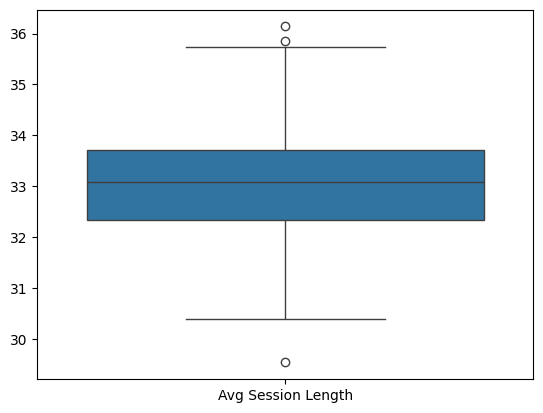

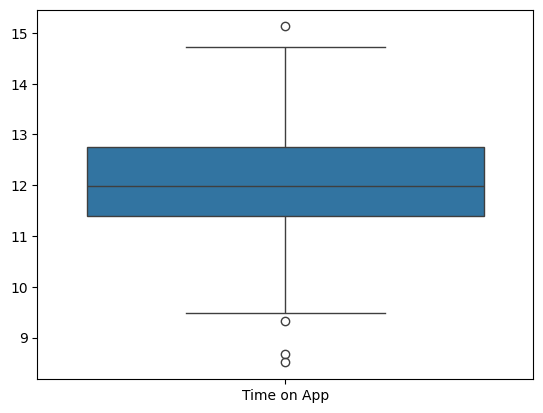

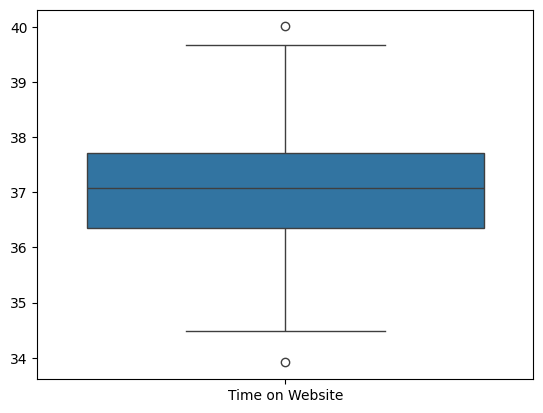

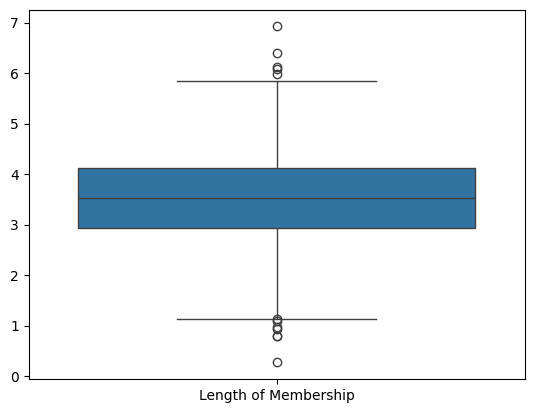

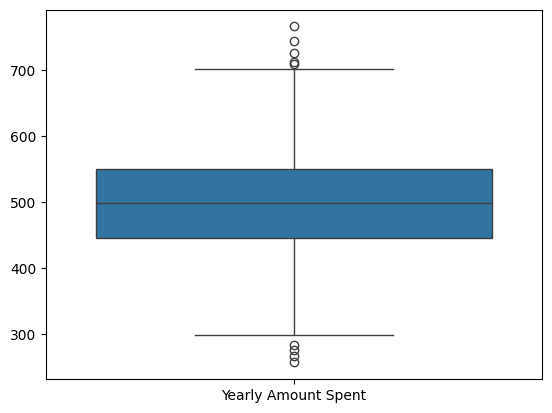

In [16]:
# Checking for outliers by drawing boxplot
c=['Avg Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']

for i in c:
    sns.boxplot(df.select(i).toPandas())
    plt.show()

In [17]:
# There is not a considerable amount of outliers in all columns

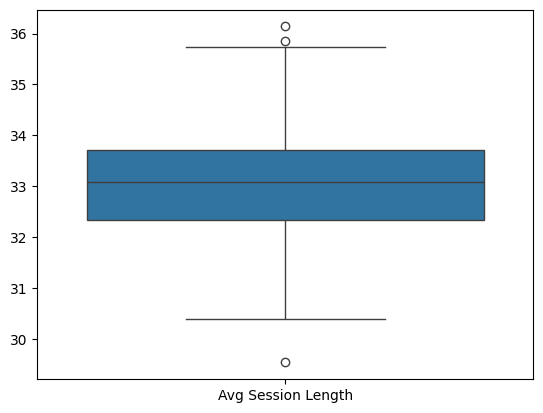

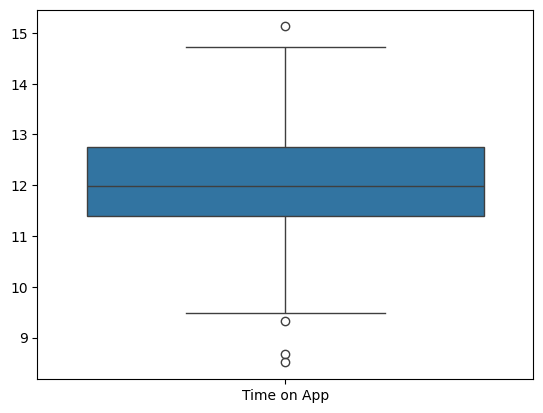

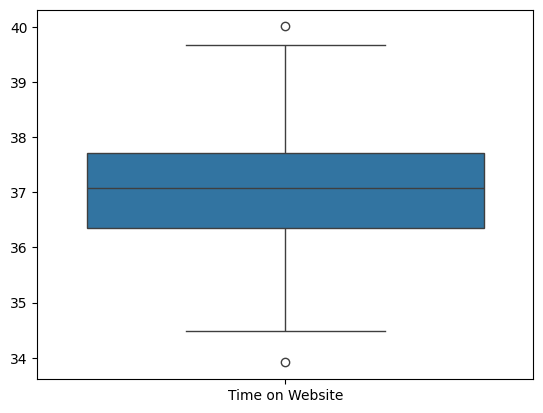

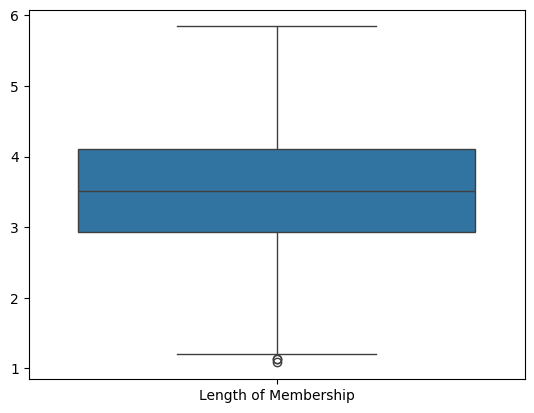

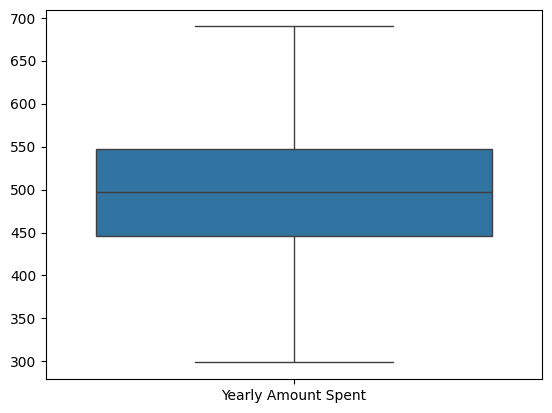

In [18]:
# Removing outliers in Length of membership and Yearly amount spent

co=['Length of Membership','Yearly Amount Spent']

for i in co:
    median_value = df.approxQuantile(i, [0.5], 0.25)[0]
    
    q=df.approxQuantile(i,[0.25,0.75],0.05)
    q1=q[0]
    q3=q[1]
    iqr=q3-q1
    
    lowerbound=q1-1.5*iqr
    upperbound=q3+1.5*iqr
    df = df.withColumn(i, when(col(i) > upperbound, median_value).otherwise(col(i)))
    df = df.withColumn(i, when(col(i) < lowerbound, median_value).otherwise(col(i)))
    
for i in c:
    sns.boxplot(df.select(i).toPandas())
    plt.show()

In [19]:
# Outliers are removed

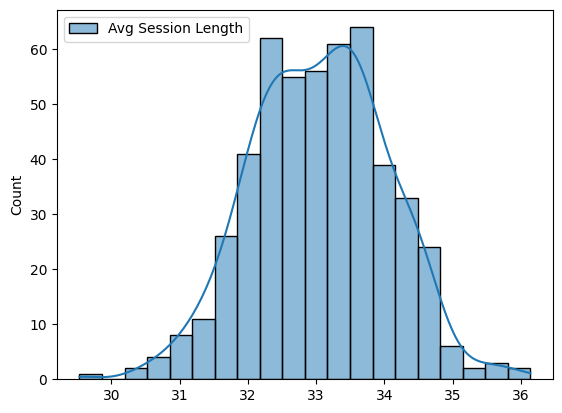

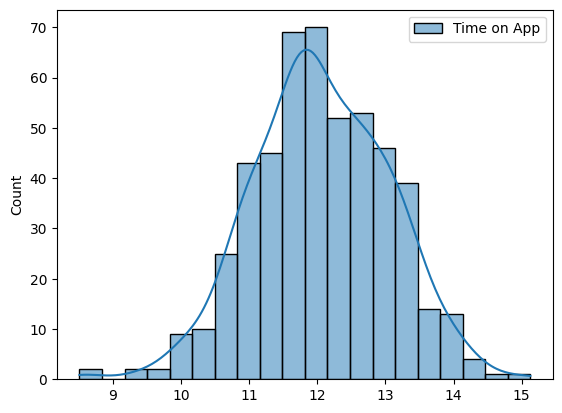

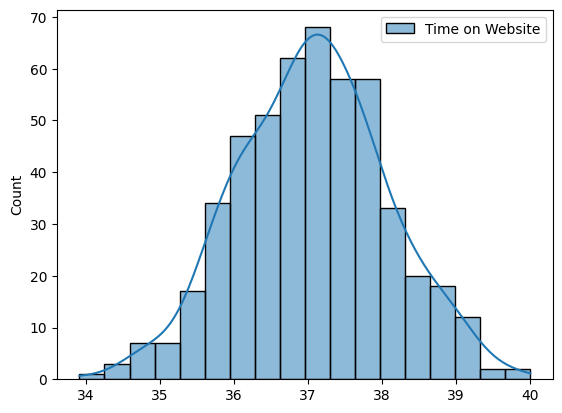

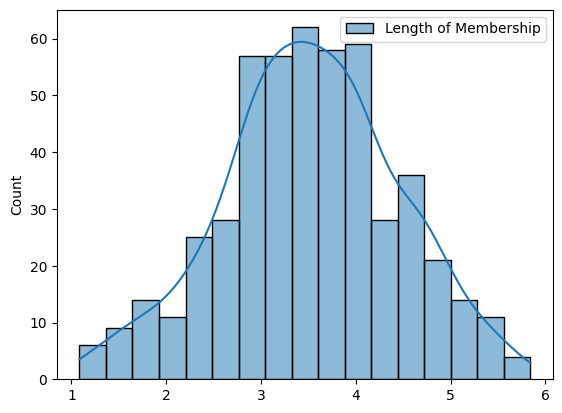

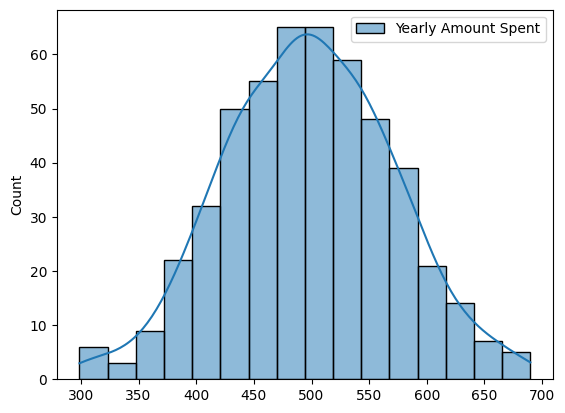

In [20]:
# Showing the distribution of data in each column
c=['Avg Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
for i in c:
    sns.histplot(df.select(i).toPandas(),kde=True)
    plt.show()

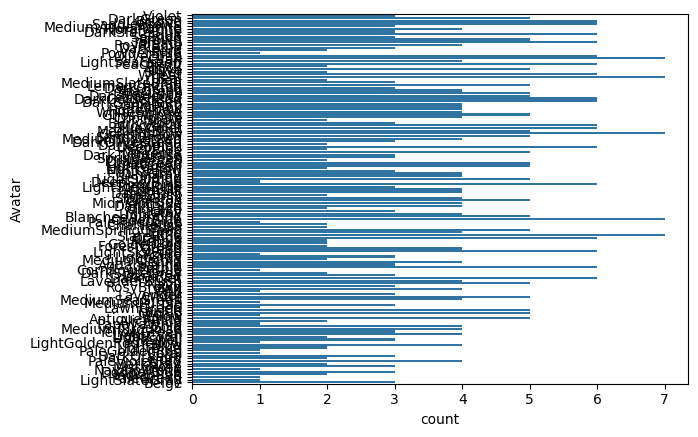

In [21]:
# Distribution of avater in countplot
sns.countplot(data=df.toPandas(),y="Avatar")
plt.show()

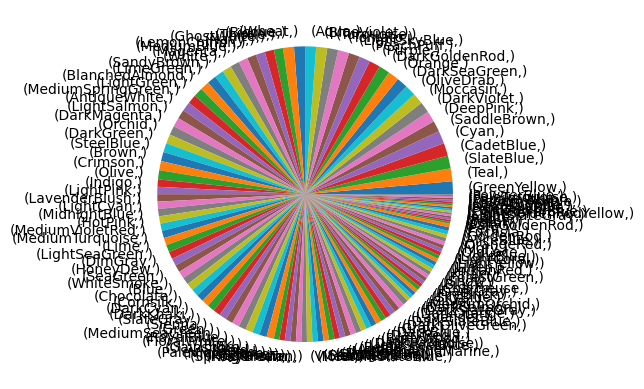

In [22]:
# Distribution of avater in piechart
df.select("Avatar").toPandas().value_counts().plot.pie()
plt.show()

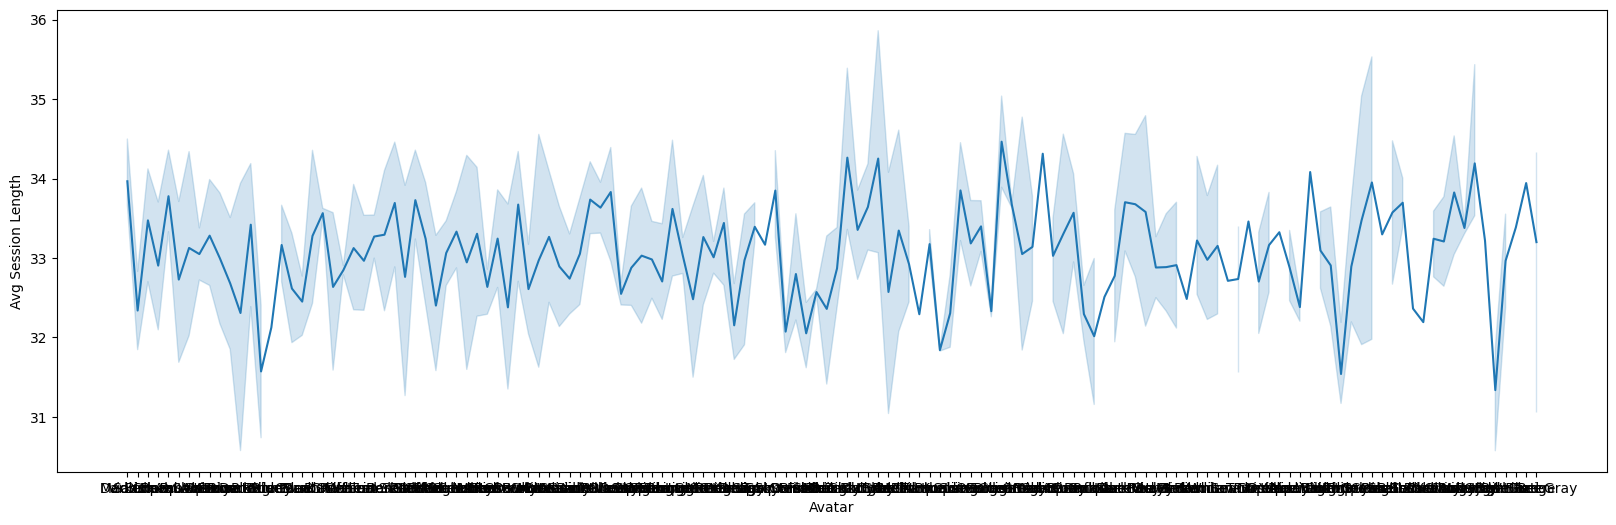

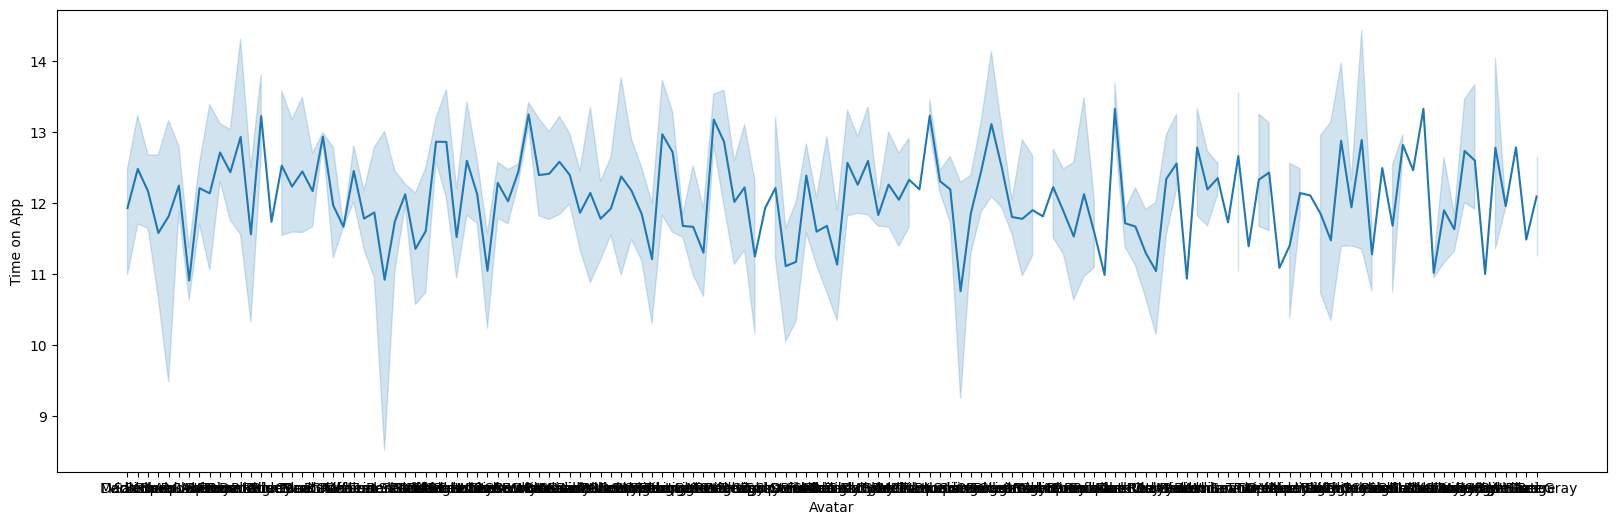

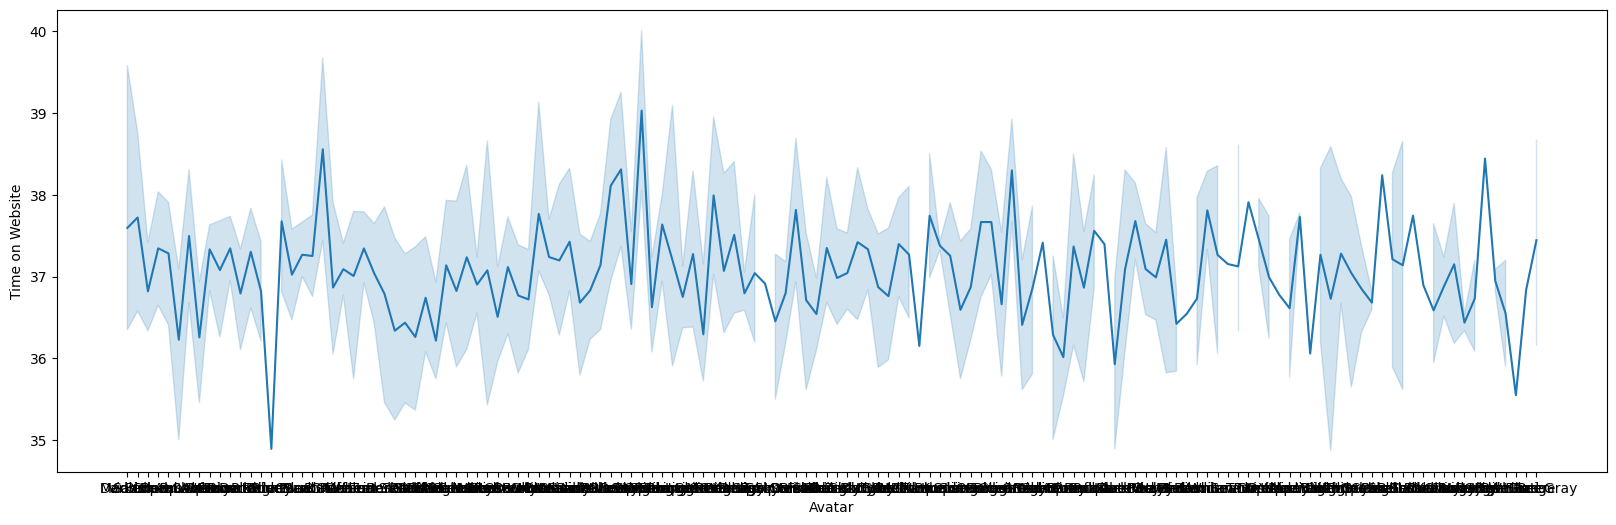

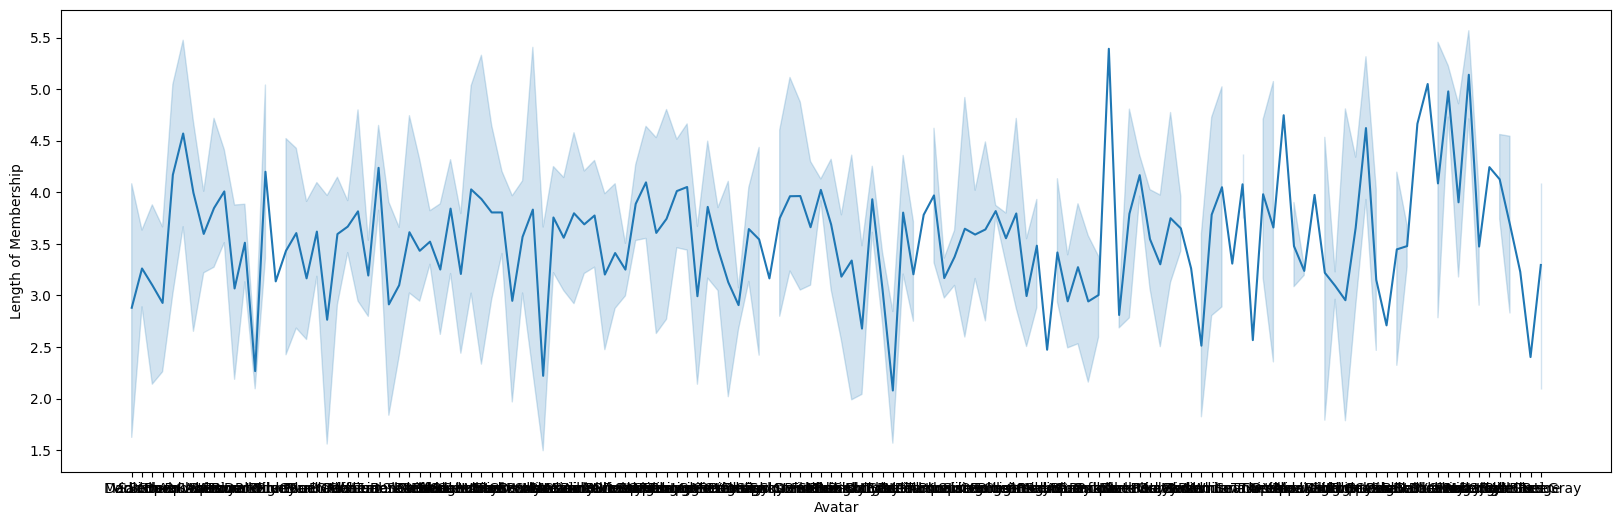

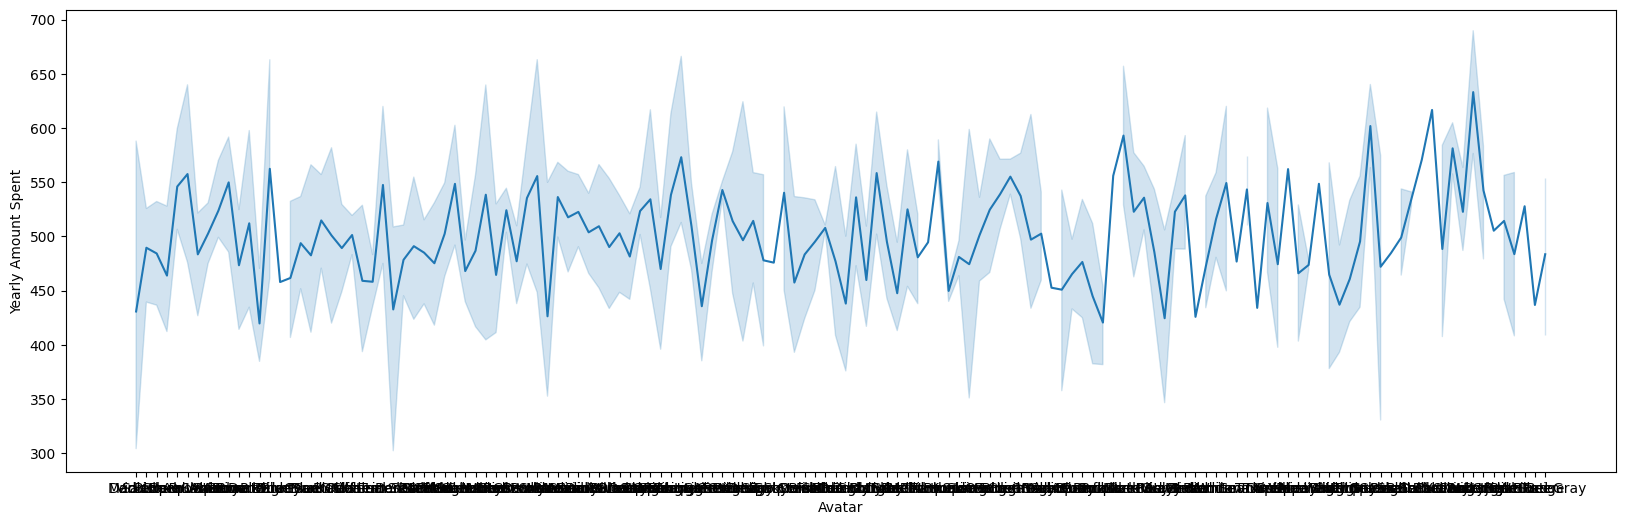

In [23]:
# Showing the distribution of data in each column as lineplot
c=['Avg Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']

for i in c:
    plt.figure(figsize=(20,6))
    sns.lineplot(x="Avatar",y=i,data=df.toPandas())
    plt.show()

In [24]:
# Checking datatypes again before ML
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [25]:
# Avatar is needed for ML. So it needs to be conveted to numerical

indexer=StringIndexer(inputCol="Avatar",outputCol="Avatar_label")
df=indexer.fit(df).transform(df)

df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)
 |-- Avatar_label: double (nullable = false)



In [26]:
# Feature vectorization

vector=VectorAssembler(inputCols=['Avg Session Length','Time on App','Time on Website','Length of Membership'],outputCol="features")
df_ML=vector.transform(df)
df_ML.show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|Avatar_label|            features|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|        96.0|[34.4972677251122...|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|        26.0|[31.9262720263601...|
|    pallen@yahoo.com|24645 Valerie

In [27]:
# Standardization

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
df_ml = scaler.fit(df_ML).transform(df_ML)

df_ml.show()

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|Avatar_label|            features|     scaled_features|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|        96.0|[34.4972677251122...|[1.45489409266702...|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.

In [28]:
# Machine Learning. 
# Splitting data. Creating model. fitting model. Evatuating model.

train_data,test_data=df_ml.randomSplit([0.8,0.2],seed=10)

model=LinearRegression(labelCol='Yearly Amount Spent',featuresCol="scaled_features")
model=model.fit(train_data)
predictions=model.transform(test_data)
print(predictions.show(5))

evaluator=RegressionEvaluator(labelCol='Yearly Amount Spent',predictionCol='prediction',metricName='rmse')
rmse=evaluator.evaluate(predictions)
print("RMSE: ",rmse)

evaluator=RegressionEvaluator(labelCol='Yearly Amount Spent',predictionCol='prediction',metricName='r2')
r2=evaluator.evaluate(predictions)
print("R2 Score",r2*100)

+--------------------+--------------------+------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+------------------+
|               Email|             Address|      Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|Avatar_label|            features|     scaled_features|        prediction|
+--------------------+--------------------+------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+------------------+
|    aaron11@luna.com|672 Jesus Roads A...|LightSkyBlue| 32.44952156114242| 13.45772494051235| 37.23880567308968|   2.941410754428091|  503.9783790525795|        12.0|[32.4495215611424...|[-0.6081950359752...| 501.5495932417802|
|   aaron89@gmail.com|0128 Sampson Loop...| SaddleBrown|31.447446494127817|10.101632

In [29]:
# The model has good R2 score. 

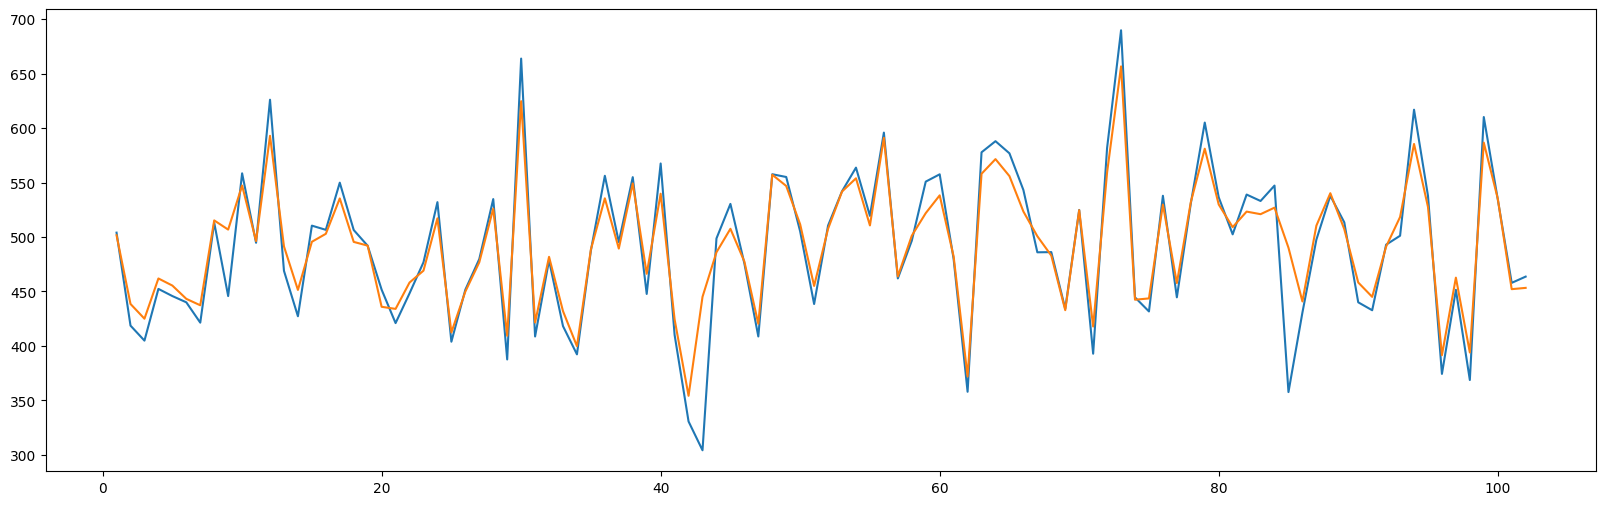

In [30]:
actual=np.array(predictions.select('Yearly Amount Spent').collect())
predict=np.array(predictions.select('prediction').collect())

indices=np.arange(1,len(actual)+1)

plt.figure(figsize=(20,6))
plt.plot(indices,actual)
plt.plot(indices,predict)
plt.show()

In [31]:
# From the figure it can seen that the model is predicting good on test data.

In [32]:
# Machine Learning. 
# Splitting data. Creating model. fitting model. Evatuating model.

train_data,test_data=df_ml.randomSplit([0.8,0.2],seed=10)

model=GBTRegressor(labelCol='Yearly Amount Spent',featuresCol="scaled_features")
model=model.fit(train_data)
predictions=model.transform(test_data)
print(predictions.show(5))

evaluator=RegressionEvaluator(labelCol='Yearly Amount Spent',predictionCol='prediction',metricName='rmse')
rmse=evaluator.evaluate(predictions)
print("RMSE: ",rmse)

evaluator=RegressionEvaluator(labelCol='Yearly Amount Spent',predictionCol='prediction',metricName='r2')
r2=evaluator.evaluate(predictions)
print("R2 Score",r2*100)

+--------------------+--------------------+------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+------------------+
|               Email|             Address|      Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|Avatar_label|            features|     scaled_features|        prediction|
+--------------------+--------------------+------------+------------------+------------------+------------------+--------------------+-------------------+------------+--------------------+--------------------+------------------+
|    aaron11@luna.com|672 Jesus Roads A...|LightSkyBlue| 32.44952156114242| 13.45772494051235| 37.23880567308968|   2.941410754428091|  503.9783790525795|        12.0|[32.4495215611424...|[-0.6081950359752...| 521.8735042772639|
|   aaron89@gmail.com|0128 Sampson Loop...| SaddleBrown|31.447446494127817|10.101632

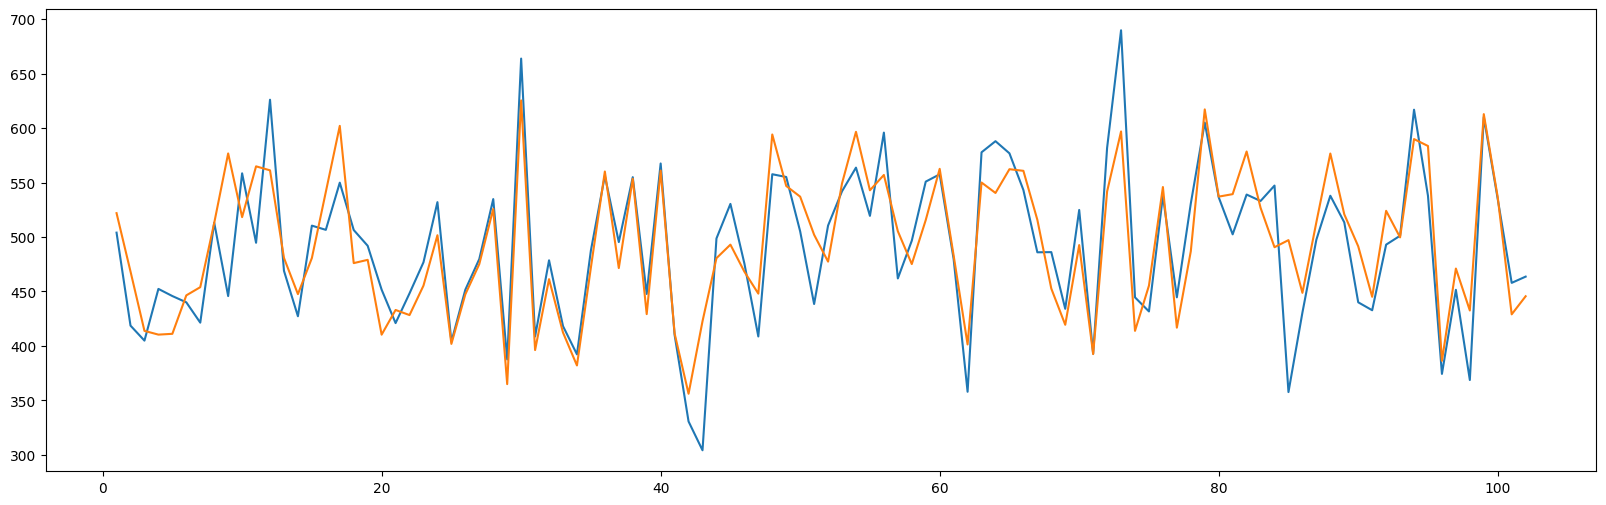

In [33]:
actual=np.array(predictions.select('Yearly Amount Spent').collect())
predict=np.array(predictions.select('prediction').collect())

indices=np.arange(1,len(actual)+1)

plt.figure(figsize=(20,6))
plt.plot(indices,actual)
plt.plot(indices,predict)
plt.show()

In [34]:
# This model also predict well on test data